# Название проекта: Анализ продаж Магазина игр.

Преамбула: Имеется магазин, который продает игры. В этом магазине имеются игры разных жанров и платформ, данные имеются от 1990-х годов вплоть до 2016 года включительно. Мы можем сделать примерный портрет пользователя северной америки, европы и японии.

Необходимо сделать прогноз на 2017 год: что будет больше всего покупать пользователь

# **Основная цель проекта:** выявление закономерностей, которая определяет успешность игры.

При анализе данных представляется следующие шаги:
1. Изучу данные на корректность. Проверю типы данные, наличие пропусков
2. Проведу исследовательский анализ данных 
3. Сформирую выводы

На каждом шаге я буду формировать выводы, которые в последующий будут учитываться при создании итогового вывода

Основные задачи: 
1. Изучу данные на корректность
 
2. Заполню пропуски, там где это возможно.
3. Проведу предобработку данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##  Открываем файл с данными и изучаем общую информацию

### Открываем файл и изучаем данные.

In [2]:
data = pd.read_csv("/datasets/games.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица имеет 16 175 строчек. 
 <ul>
    <li>Name - Наименование</li>
    <li>Year_of_Release — год выпуска</li>
    <li>Genre — жанр игры</li>
    <li>NA_sales — продажи в Северной Америке (миллионы проданных копий) </li>
    <li>EU_sales — продажи в Европе (миллионы проданных копий)</li>
    <li>JP_sales — продажи в Японии (миллионы проданных копий)</li>
    <li>Other_sales — продажи в других странах (миллионы проданных копий)</li>
    <li>Critic_Score — оценка критиков (максимум 100)</li>
    <li>User_Score — оценка пользователей (максимум 10)</li>
    <li>Rating — рейтинг от организации ESRB</li>
   
   </ul>


Мы видим, что некоторые ячейки не заполнены. Проверим, сколько таких ячеек.

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Начинаем предобработку данных

### Некоторые ячейки пустые. Изучим фронт работы

In [4]:
data.isna().sum().sort_values(ascending=False)

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

Выведем данные в процентом соотношении.

In [5]:
pd.DataFrame(round(data.isna().mean()*100,).sort_values(ascending= False)).style.background_gradient('coolwarm')

,0
Critic_Score,51.000000
User_Score,40.000000
Rating,40.000000
Year_of_Release,2.000000
Name,0.000000
Platform,0.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000


In [6]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot( kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
        )
        plt.title('Процентное количество пропусков' + "\n", fontsize = 22, color = 'SteelBlue') # переименовал
        plt.xlabel('Проценты', fontsize = 22)  # Добавляем название оси x
        plt.grid(True)  # Включаем сетку
        plt.show()
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

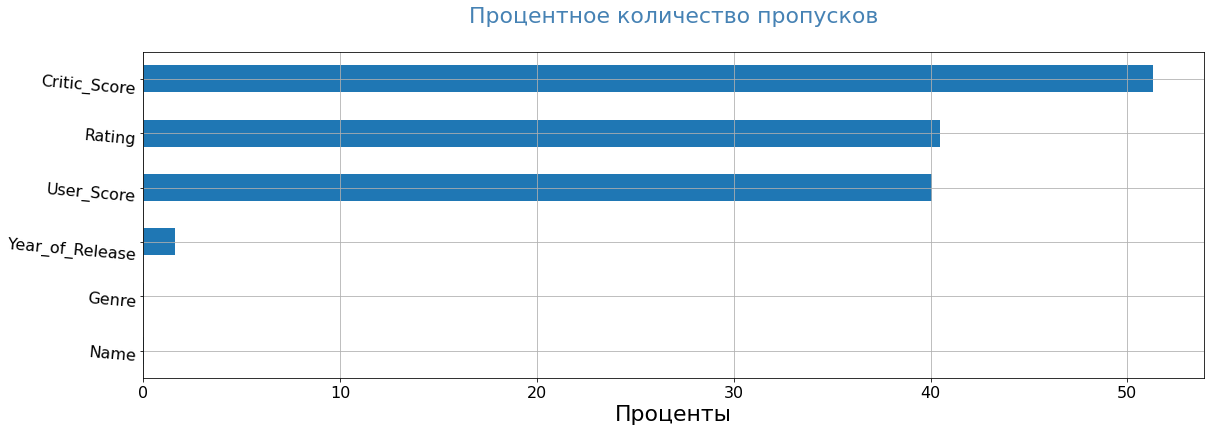

In [7]:
pass_value_barh(data)

#### Вывод:
Мы проверили данные на наличие пропусков: 
- они есть больше всего в critic_score (около 51%), User_Scor (40%), Rating	(40%), Year_of_Release(2%)

### Изменяем регистр колонок

In [8]:
data.columns = map(str.lower, data.columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
data['name'] = data['name'].str.lower()
data['genre'] = data['genre'].str.lower()


#### Вывод
Регистр колонок изменен

### Исходя из данных, на мой взгляд, нужно преобразовать:
- year_of_release - в int64
- user_score - в int64 <br>
<b>Но прежде чем изменять данные нужно заполнить пропуски.</b>

### Удалим малозначительные данные. (до 5 процентов)

In [10]:
data[data['name'].isna()].sort_values(by='na_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
data[data['year_of_release'].isna()].sort_values(by='na_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,frogger's adventures: temple of the frog,GBA,NaN,adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,rock band,X360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,lego batman: the videogame,Wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
...,...,...,...,...,...,...,...,...,...,...,...
11000,demon chaos,PS2,NaN,action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10837,egg monster hero,DS,NaN,role-playing,0.00,0.00,0.09,0.00,NaN,NaN,E
15022,umineko no naku koro ni san: shinjitsu to gens...,PS3,NaN,adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10764,luminous arc 2 (jp sales),DS,NaN,role-playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN


In [12]:
data[data['genre'].isna()].sort_values(by='na_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [14]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [15]:
data.query('user_score == "tbd"')['name'].count()

2376

Исходя из подсчетов "name", мы видим, что около двух тысяч (2376) имеют значение tbd (to be determined). При анализе продаж, на мой взгляд, в данном случае замена tbd на -5, не исказит данные, поскольку рейтинга такого точно нет.

In [16]:

data['user_score'] = data['user_score'].replace('tbd', -5)

К сожалению в столбцах:
- critic_score;
- user_score;
- rating ; <br>
данными заполнить невозможно каким то образом. 
Заполним медианным значением и категорией.

In [17]:
data.median()

year_of_release    2007.00
na_sales              0.08
eu_sales              0.02
jp_sales              0.00
other_sales           0.01
critic_score         71.00
user_score            6.90
dtype: float64

In [18]:
data['rating'] = data['rating'].fillna('Неопределено')

data['rating'].value_counts()



Неопределено    6676
E               3921
T               2905
M               1536
E10+            1393
EC                 8
K-A                3
RP                 1
AO                 1
Name: rating, dtype: int64

In [19]:
data['critic_score'] = data['critic_score'].fillna(-5)
data['user_score'] = data['user_score'].fillna(-5)

In [20]:

data['year_of_release'] = data['year_of_release'].astype('Int64') # год не может быть float
data['user_score'] = data['user_score'].astype('float64') #здесь численное значение

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [22]:
data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,-5.0,-5.0,Неопределено
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,-5.0,-5.0,Неопределено
5,tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,-5.0,-5.0,Неопределено
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,-5.0,-5.0,Неопределено


#### Вывод
Мы сделали следующую предобработку данных:
1. В cтолбце name - мы удалили 2 объекта - у него отсутсвует выручка
2. В столбце 'user_score' - имеется непонятный показатель tbd (to be determined) - мы его меняем на показатель -5 (его точно нет в выборке)
3. В столбце rating - отсутствующие показатели мы меняем на "Неопределено"
4. В столбце rating малозначительные данные EC, K-A, AO, RP  переименовал в более значительные категории либо удалили.
5. По численным значениям в столбцах user_score, critic_score заполнил медианой - поскольку она более устойчива к выбросам данных
6. Изменил тип данных 'year_of_release' 'user_score' на int float соответственно

### Выведем суммарную выручку по регионам в разрезе игр:

In [23]:
data['total_income'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
можно
    
    df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [24]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,-5.0,-5.0,Неопределено,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,-5.0,-5.0,Неопределено,31.38
5,tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,-5.0,-5.0,Неопределено,30.26
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,-5.0,-5.0,Неопределено,28.31


#### Вывод 
Вывели

In [25]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,-5.0,-5.0,Неопределено,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,-5.0,-5.0,Неопределено,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,action,0.00,0.00,0.01,0.00,-5.0,-5.0,Неопределено,0.01
16711,lma manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,-5.0,-5.0,Неопределено,0.01
16712,haitaka no psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,-5.0,-5.0,Неопределено,0.01
16713,spirits & spells,GBA,2003,platform,0.01,0.00,0.00,0.00,-5.0,-5.0,Неопределено,0.01


### Изменим наименования платформ

In [26]:
display(data['platform'].unique())


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Предлагаю переименовать данные аббревиатуры

In [27]:
data['platform'] = data['platform'].apply(lambda x: {
    '2600': 'Atari 2600',
    'Wii': 'Nintendo Wii',
    'NES': 'Nintendo NES',
    'GB': 'GB-60',
    'DS': 'Nintendo DS',
    'X360': 'Xbox 360',
    'SNES': 'Nintendo SNES',
    'NG': 'N-Gage',
    'GBA': 'Game Boy Advance',
    '3DS': 'Nintendo 3DS',
    'N64': 'Nintendo 64',
    'XB': 'Xbox',
    'XOne': 'Xbox One',
    'WiiU': 'Nintendo Wii U',
    'GC': 'Nintendo GameCube',
    'GEN': 'SEGA Retro Genesis',
    'DC': 'Dendy Classic',
    'PSV': 'PS Vita',
    'SAT': 'Sega Saturn',
    'WS': 'WonderSwan',
    'TG16': 'NEC TurboGrafx',
    '3DO': 'Panasonic 3DO',
    'GG': 'Game Gear',
    'PCFX': 'NEC PC-FX',
    'SCD' : "Sega CD",
}.get(x, x))



#### Вывод
Переименовано успешно

### Изучим количество платформ, на которых издавались игры.

In [28]:
bot_platform = data['platform'].value_counts()
bot_platform 

PS2                   2127
Nintendo DS           2121
PS3                   1306
Nintendo Wii          1286
Xbox 360              1232
PSP                   1193
PS                    1190
PC                     957
Game Boy Advance       811
Xbox                   803
Nintendo GameCube      542
Nintendo 3DS           512
PS Vita                429
PS4                    392
Nintendo 64            316
Xbox One               247
Nintendo SNES          239
Sega Saturn            173
Nintendo Wii U         147
Atari 2600             116
Nintendo NES            98
GB-60                   97
Dendy Classic           52
SEGA Retro Genesis      27
N-Gage                  12
Sega CD                  6
WonderSwan               6
Panasonic 3DO            3
NEC TurboGrafx           2
Game Gear                1
NEC PC-FX                1
Name: platform, dtype: int64

In [29]:
# Удалим малозначительные платформы (меньше 100)
bot_platform = bot_platform.loc[bot_platform  <=100]

In [30]:
# сохраним наименование платформа в список
bot_platform = bot_platform.index.to_list() 

In [31]:
bot_platform

['Nintendo NES',
 'GB-60',
 'Dendy Classic',
 'SEGA Retro Genesis',
 'N-Gage',
 'Sega CD',
 'WonderSwan',
 'Panasonic 3DO',
 'NEC TurboGrafx',
 'Game Gear',
 'NEC PC-FX']

In [32]:
def filtered_data(filter_list, data):
    """
   функция для просмотра игр, общее количество которых меньше 100
    """ 

    filtered_data = data[data['platform'].isin(filter_list)]

    platform_tables = {}
    for platform in filter_list:
        platform_tables[platform] = filtered_data[filtered_data['platform'] == platform]
    
    return platform_tables


In [33]:
platform_table = filtered_data(bot_platform, data)

In [34]:
platform_table["Game Gear"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
13571,sonic the hedgehog 2 (8-bit),Game Gear,1992,platform,0.0,0.0,0.04,0.0,-5.0,-5.0,Неопределено,0.04


Удалить - игра не прибыльная

In [35]:
platform_table['NEC PC-FX']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
14634,blue breaker: ken yorimo hohoemi o,NEC PC-FX,1996,role-playing,0.0,0.0,0.03,0.0,-5.0,-5.0,Неопределено,0.03


Удалить - игра не прибыльная

In [36]:
platform_table['NEC TurboGrafx']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
9223,doukyuusei,NEC TurboGrafx,1995,adventure,0.0,0.0,0.14,0.0,-5.0,-5.0,Неопределено,0.14
15633,ginga fukei densetsu: sapphire,NEC TurboGrafx,1995,shooter,0.0,0.0,0.02,0.0,-5.0,-5.0,Неопределено,0.02


Удалить - игры не прибыльные

In [37]:
platform_table['Panasonic 3DO']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
12663,policenauts,Panasonic 3DO,1995,adventure,0.0,0.0,0.06,0.0,-5.0,-5.0,Неопределено,0.06
15076,bust-a-move,Panasonic 3DO,1994,puzzle,0.0,0.0,0.02,0.0,-5.0,-5.0,Неопределено,0.02
15560,sotsugyou ii: neo generation special,Panasonic 3DO,1995,simulation,0.0,0.0,0.02,0.0,-5.0,-5.0,Неопределено,0.02


Удалить - игры не прибыльные

In [38]:
platform_table['WonderSwan']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
3926,final fantasy,WonderSwan,2000,role-playing,0.0,0.0,0.51,0.0,-5.0,-5.0,Неопределено,0.51
6110,digimon adventure: anode tamer,WonderSwan,1999,role-playing,0.0,0.0,0.28,0.0,-5.0,-5.0,Неопределено,0.28
6650,final fantasy ii,WonderSwan,2001,role-playing,0.0,0.0,0.25,0.0,-5.0,-5.0,Неопределено,0.25
8039,chocobo no fushigi dungeon for wonderswan,WonderSwan,1999,role-playing,0.0,0.0,0.18,0.0,-5.0,-5.0,Неопределено,0.18
8294,super robot taisen compact 2 dai-1-bu,WonderSwan,2000,strategy,0.0,0.0,0.17,0.0,-5.0,-5.0,Неопределено,0.17
14224,sd gundam g generation: gather beat 2,WonderSwan,2001,strategy,0.0,0.0,0.03,0.0,-5.0,-5.0,Неопределено,0.03


Удалить - игры не прибыльные

In [39]:
platform_table['Sega CD']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
1263,sonic cd,Sega CD,1993,platform,1.0,0.36,0.09,0.05,-5.0,-5.0,Неопределено,1.50
9008,shining force cd,Sega CD,1994,strategy,0.0,0.00,0.14,0.00,-5.0,-5.0,Неопределено,0.14
11781,formula one world championship: beyond the limit,Sega CD,1994,racing,0.0,0.00,0.07,0.00,-5.0,-5.0,Неопределено,0.07
12612,record of lodoss war: eiyuu sensou,Sega CD,1994,role-playing,0.0,0.00,0.06,0.00,-5.0,-5.0,Неопределено,0.06
13010,game no kanzume vol 2,Sega CD,1994,misc,0.0,0.00,0.05,0.00,-5.0,-5.0,Неопределено,0.05
13489,game no kanzume vol 1,Sega CD,1994,misc,0.0,0.00,0.04,0.00,-5.0,-5.0,Неопределено,0.04


Удалить - игры не прибыльные

In [40]:
platform_table['N-Gage']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
6663,samurai shodown ii,N-Gage,1994,fighting,0.0,0.0,0.25,0.0,-5.0,-5.0,Неопределено,0.25
7017,the king of fighters '95 (cd),N-Gage,1994,fighting,0.0,0.0,0.23,0.0,-5.0,-5.0,Неопределено,0.23
7499,the king of fighters '95,N-Gage,1995,fighting,0.0,0.0,0.20,0.0,-5.0,-5.0,Неопределено,0.20
7542,samurai spirits (cd),N-Gage,1994,fighting,0.0,0.0,0.20,0.0,-5.0,-5.0,Неопределено,0.20
9201,the king of fighters '94 (cd),N-Gage,1993,fighting,0.0,0.0,0.14,0.0,-5.0,-5.0,Неопределено,0.14
9710,the king of fighters '94,N-Gage,1994,fighting,0.0,0.0,0.12,0.0,-5.0,-5.0,Неопределено,0.12
11528,samurai shodown iii,N-Gage,1995,fighting,0.0,0.0,0.08,0.0,-5.0,-5.0,Неопределено,0.08
12119,samurai shodown,N-Gage,1993,fighting,0.0,0.0,0.07,0.0,-5.0,-5.0,Неопределено,0.07
12823,the king of fighters '96,N-Gage,1996,fighting,0.0,0.0,0.06,0.0,-5.0,-5.0,Неопределено,0.06
13968,art of fighting 3: the path of the warrior,N-Gage,1996,fighting,0.0,0.0,0.04,0.0,-5.0,-5.0,Неопределено,0.04


Удалить - игры не прибыльные

In [41]:
platform_table['SEGA Retro Genesis']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
145,sonic the hedgehog 2,SEGA Retro Genesis,1992,platform,4.47,1.20,0.16,0.19,-5.0,-5.0,Неопределено,6.02
257,sonic the hedgehog,SEGA Retro Genesis,1991,platform,3.03,0.91,0.26,0.13,-5.0,-5.0,Неопределено,4.33
564,mortal kombat,SEGA Retro Genesis,1992,fighting,1.95,0.63,0.00,0.09,-5.0,-5.0,Неопределено,2.67
588,streets of rage,SEGA Retro Genesis,1990,action,1.86,0.55,0.11,0.08,-5.0,-5.0,Неопределено,2.60
832,nba jam,SEGA Retro Genesis,1992,sports,1.75,0.25,0.00,0.05,-5.0,-5.0,Неопределено,2.05
960,sonic & knuckles,SEGA Retro Genesis,1994,platform,1.24,0.43,0.03,0.12,-5.0,-5.0,Неопределено,1.82
996,sonic the hedgehog 3,SEGA Retro Genesis,1994,platform,1.02,0.47,0.20,0.07,-5.0,-5.0,Неопределено,1.76
1099,street fighter ii': special champion edition,SEGA Retro Genesis,1992,fighting,1.00,0.30,0.31,0.04,-5.0,-5.0,Неопределено,1.65
1365,disney's the lion king,SEGA Retro Genesis,1994,platform,0.97,0.37,0.03,0.05,-5.0,-5.0,Неопределено,1.42
1453,mortal kombat 3,SEGA Retro Genesis,1994,fighting,1.03,0.27,0.00,0.04,-5.0,-5.0,Неопределено,1.34


В данной выборке есть игры, которые принесли прибыль компании, но с учетом того, что их релиз был в 1990-е годы, актуальность их потерялась. Предлагаю оставить, но только потому что там указана прибыль хорошая.

In [42]:
platform_table['Dendy Classic'].sort_values(by='total_income',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
643,sonic adventure,Dendy Classic,1998,platform,1.26,0.61,0.46,0.08,-5.0,-5.0,Неопределено,2.41
966,crazy taxi,Dendy Classic,2000,racing,1.10,0.51,0.12,0.08,-5.0,-5.0,Неопределено,1.81
1679,nfl 2k,Dendy Classic,1999,sports,1.12,0.05,0.00,0.02,-5.0,-5.0,Неопределено,1.19
1712,shenmue,Dendy Classic,1999,adventure,0.52,0.24,0.38,0.04,88.0,9.4,T,1.18
1787,resident evil - code: veronica,Dendy Classic,2000,action,0.41,0.23,0.47,0.03,-5.0,-5.0,Неопределено,1.14
1877,nfl 2k1,Dendy Classic,2000,sports,1.02,0.05,0.00,0.02,97.0,6.0,E,1.09
3815,seaman,Dendy Classic,1999,simulation,0.00,0.00,0.52,0.00,82.0,8.4,T,0.52
4665,sega rally championship 2,Dendy Classic,1999,racing,0.00,0.00,0.41,0.00,-5.0,-5.0,Неопределено,0.41
5145,virtua fighter 3tb,Dendy Classic,1998,fighting,0.00,0.00,0.37,0.00,-5.0,-5.0,Неопределено,0.37
5240,j-league pro soccer club o tsukurou!,Dendy Classic,1999,sports,0.00,0.00,0.36,0.00,-5.0,-5.0,Неопределено,0.36


В данной выборке есть игры, которые принесли прибыль компании, но с учетом того, что их релиз был в 1990-е годы, актуальность их потерялась. Предлагаю оставить, но только потому что там указана прибыль хорошая.

In [43]:
platform_table['GB-60']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
4,pokemon red/pokemon blue,GB-60,1996,role-playing,11.27,8.89,10.22,1.00,-5.0,-5.0,Неопределено,31.38
5,tetris,GB-60,1989,puzzle,23.20,2.26,4.22,0.58,-5.0,-5.0,Неопределено,30.26
12,pokemon gold/pokemon silver,GB-60,1999,role-playing,9.00,6.18,7.20,0.71,-5.0,-5.0,Неопределено,23.09
21,super mario land,GB-60,1989,platform,10.83,2.71,4.18,0.42,-5.0,-5.0,Неопределено,18.14
30,pokémon yellow: special pikachu edition,GB-60,1998,role-playing,5.89,5.04,3.12,0.59,-5.0,-5.0,Неопределено,14.64
...,...,...,...,...,...,...,...,...,...,...,...,...
11834,mega man xtreme,GB-60,2000,platform,0.00,0.00,0.07,0.00,-5.0,-5.0,Неопределено,0.07
11847,mega man xtreme 2,GB-60,2001,platform,0.00,0.00,0.07,0.00,-5.0,-5.0,Неопределено,0.07
11982,metal gear solid,GB-60,2000,action,0.00,0.00,0.07,0.00,-5.0,-5.0,Неопределено,0.07
12143,power pro gb,GB-60,1998,sports,0.00,0.00,0.07,0.00,-5.0,-5.0,Неопределено,0.07


В данной выборке есть игры, которые принесли прибыль компании, но с учетом того, что их релиз был в 1990-е годы, актуальность их потерялась. Предлагаю оставить, но только потому что там указана прибыль хорошая.

In [44]:
platform_table['Nintendo NES']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
1,super mario bros.,Nintendo NES,1985,platform,29.08,3.58,6.81,0.77,-5.0,-5.0,Неопределено,40.24
9,duck hunt,Nintendo NES,1984,shooter,26.93,0.63,0.28,0.47,-5.0,-5.0,Неопределено,28.31
22,super mario bros. 3,Nintendo NES,1988,platform,9.54,3.44,3.84,0.46,-5.0,-5.0,Неопределено,17.28
98,super mario bros. 2,Nintendo NES,1988,platform,5.39,1.18,0.70,0.19,-5.0,-5.0,Неопределено,7.46
124,the legend of zelda,Nintendo NES,1986,action,3.74,0.93,1.69,0.14,-5.0,-5.0,Неопределено,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...
5858,famista '91,Nintendo NES,1990,sports,0.00,0.00,0.30,0.00,-5.0,-5.0,Неопределено,0.30
6139,famista '92,Nintendo NES,1991,sports,0.00,0.00,0.28,0.00,-5.0,-5.0,Неопределено,0.28
10290,final fantasy i & ii,Nintendo NES,1994,role-playing,0.00,0.00,0.11,0.00,-5.0,-5.0,Неопределено,0.11
12022,teenage mutant ninja turtles: tournament fighters,Nintendo NES,1992,fighting,0.04,0.01,0.02,0.00,-5.0,-5.0,Неопределено,0.07


In [45]:
data = data.loc[~data["platform"].
                   isin(['N-Gage',
                         'WonderSwan',
                         'Sega CD',
                         'Panasonic 3DO',
                         'NEC TurboGrafx',
                         'Game Gear', 'NEC PC-FX'])]

#### Вывод:
В данной выборке есть игры, которые принесли прибыль компании, но с учетом того, что их релиз был в 1990-е годы, актуальность их потерялась. Предлагаю оставить, но только потому что там указана прибыль хорошая.

Из выборки удаляем  
'N-Gage',
 'WonderSwan',
 'Sega CD',
 'Panasonic 3DO',
 'NEC TurboGrafx',
 'Game Gear',
 'NEC PC-FX'

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16413 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16413 non-null  object 
 1   platform         16413 non-null  object 
 2   year_of_release  16413 non-null  Int64  
 3   genre            16413 non-null  object 
 4   na_sales         16413 non-null  float64
 5   eu_sales         16413 non-null  float64
 6   jp_sales         16413 non-null  float64
 7   other_sales      16413 non-null  float64
 8   critic_score     16413 non-null  float64
 9   user_score       16413 non-null  float64
 10  rating           16413 non-null  object 
 11  total_income     16413 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


### Проверяем на корректность данных столбцов

In [47]:
display(data['platform'].sort_values().unique())

array(['Atari 2600', 'Dendy Classic', 'GB-60', 'Game Boy Advance',
       'Nintendo 3DS', 'Nintendo 64', 'Nintendo DS', 'Nintendo GameCube',
       'Nintendo NES', 'Nintendo SNES', 'Nintendo Wii', 'Nintendo Wii U',
       'PC', 'PS', 'PS Vita', 'PS2', 'PS3', 'PS4', 'PSP',
       'SEGA Retro Genesis', 'Sega Saturn', 'Xbox', 'Xbox 360',
       'Xbox One'], dtype=object)

с платформой ок

In [48]:
display(data['year_of_release'].sort_values().unique())

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Length: 37, dtype: Int64

С годами релиза тоже ок,

In [49]:
display(data['genre'].sort_values().unique())

array(['action', 'adventure', 'fighting', 'misc', 'platform', 'puzzle',
       'racing', 'role-playing', 'shooter', 'simulation', 'sports',
       'strategy'], dtype=object)

In [50]:
display(data['rating'].sort_values().unique())

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'Неопределено'],
      dtype=object)

K-A то старое название. Актуальное E. Заменим.


In [51]:
data['rating'] = data['rating'].apply(lambda x: {
    'K-A': 'E', 
    'AO': 'M', 
    'E10+': 'T', 
    'EC': 'E'}.get(x, x))
    

/tmp/ipykernel_48/4117338478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['rating'].apply(lambda x: {


In [52]:
data['rating'].value_counts()

Неопределено    6645
T               4298
E               3932
M               1537
RP                 1
Name: rating, dtype: int64

Исходя из выборки предлгаю осталось RP - Rating Pending. Рейтинг ожидается. Как правило, такое пишут на демо-версиях игр.

In [53]:
data.query('rating == "RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
14270,supreme ruler: cold war,PC,2011,strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP,0.04


In [54]:
data = data.loc[data['rating'] != 'RP']

#### Вывод
Чекнули

In [55]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16412 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16412 non-null  object 
 1   platform         16412 non-null  object 
 2   year_of_release  16412 non-null  Int64  
 3   genre            16412 non-null  object 
 4   na_sales         16412 non-null  float64
 5   eu_sales         16412 non-null  float64
 6   jp_sales         16412 non-null  float64
 7   other_sales      16412 non-null  float64
 8   critic_score     16412 non-null  float64
 9   user_score       16412 non-null  float64
 10  rating           16412 non-null  object 
 11  total_income     16412 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


Пропуски могли возникнуть по нескольким причиниам: 
1. Человеческий фактор: человек не знал/не хотел/ явно не желал указывать данные
2. Технический фактор: выгрузка базы данных неккоректна

### Проверка на явные не явные дубликаты

In [56]:
data[data.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income


In [57]:
data[data.duplicated(subset=['name', "platform", 'year_of_release'], keep='first')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
16230,madden nfl 13,PS3,2012,sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


In [58]:
data = data.drop_duplicates(subset=['name', "platform", 'year_of_release'], keep='first')

In [59]:
data.query('name == "madden nfl 13" ')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
507,madden nfl 13,Xbox 360,2012,sports,2.53,0.15,0.0,0.17,81.0,5.8,E,2.85
604,madden nfl 13,PS3,2012,sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
3986,madden nfl 13,Nintendo Wii,2012,sports,0.47,0.00,0.0,0.03,-5.0,7.3,E,0.50
5887,madden nfl 13,PS Vita,2012,sports,0.28,0.00,0.0,0.02,63.0,7.3,E,0.30
7066,madden nfl 13,Nintendo Wii U,2012,sports,0.21,0.00,0.0,0.02,75.0,6.7,E,0.23


In [60]:
data['name'].value_counts()

need for speed: most wanted    12
ratatouille                     9
lego marvel super heroes        9
fifa 14                         9
madden nfl 07                   8
                               ..
xbox music mixer                1
gretzky nhl                     1
crazy taxi: catch a ride        1
kingdom hearts re:coded         1
philosoma                       1
Name: name, Length: 11399, dtype: int64

In [61]:
data.query('name == "need for speed: most wanted"').sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
6473,need for speed: most wanted,Game Boy Advance,2005,racing,0.19,0.07,0.00,0.00,-5.0,8.3,E,0.26
6410,need for speed: most wanted,Nintendo DS,2005,racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27
3581,need for speed: most wanted,Nintendo GameCube,2005,racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56
6273,need for speed: most wanted,Nintendo Wii U,2013,racing,0.13,0.12,0.00,0.02,-5.0,-5.0,Неопределено,0.27
5972,need for speed: most wanted,PC,2005,racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,need for speed: most wanted,PC,2012,racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
2048,need for speed: most wanted,PS Vita,2012,racing,0.33,0.45,0.01,0.22,-5.0,-5.0,Неопределено,1.01
253,need for speed: most wanted,PS2,2005,racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37
523,need for speed: most wanted,PS3,2012,racing,0.71,1.46,0.06,0.58,-5.0,-5.0,Неопределено,2.81
1998,need for speed: most wanted,Xbox,2005,racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04


Есть дубли: NFS : Xbox360 & PC, но это разные игры.

In [62]:
data.query('name == "fifa 14"').sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
6871,fifa 14,Nintendo 3DS,2013,sports,0.00,0.22,0.00,0.01,-5.0,-5.0,Неопределено,0.23
4985,fifa 14,Nintendo Wii,2013,sports,0.00,0.36,0.00,0.02,-5.0,4.3,E,0.38
4809,fifa 14,PC,2013,sports,0.01,0.36,0.00,0.03,87.0,4.6,E,0.40
4699,fifa 14,PS Vita,2013,sports,0.08,0.23,0.01,0.09,-5.0,1.8,E,0.41
126,fifa 14,PS3,2013,sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
469,fifa 14,PS4,2013,sports,0.61,1.85,0.11,0.44,87.0,6.3,E,3.01
7875,fifa 14,PSP,2013,sports,0.00,0.15,0.00,0.04,-5.0,3.4,E,0.19
271,fifa 14,Xbox 360,2013,sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
1753,fifa 14,Xbox One,2013,sports,0.41,0.66,0.00,0.09,88.0,5.8,E,1.16


In [63]:
data.query('name == "lego marvel super heroes"').sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
2313,lego marvel super heroes,Nintendo 3DS,2013,action,0.42,0.36,0.04,0.07,61.0,5.2,T,0.89
5054,lego marvel super heroes,Nintendo DS,2013,action,0.22,0.13,0.00,0.03,-5.0,4.8,T,0.38
2778,lego marvel super heroes,Nintendo Wii U,2013,action,0.31,0.35,0.02,0.06,82.0,8.0,T,0.74
8369,lego marvel super heroes,PC,2013,action,0.04,0.12,0.00,0.01,78.0,8.1,T,0.17
3876,lego marvel super heroes,PS Vita,2013,action,0.11,0.29,0.00,0.11,-5.0,-5.0,Неопределено,0.51
945,lego marvel super heroes,PS3,2013,action,0.77,0.76,0.01,0.29,82.0,7.9,T,1.83
1139,lego marvel super heroes,PS4,2013,action,0.59,0.76,0.01,0.26,83.0,7.7,T,1.62
730,lego marvel super heroes,Xbox 360,2013,action,1.24,0.79,0.00,0.19,80.0,7.6,T,2.22
1959,lego marvel super heroes,Xbox One,2013,action,0.61,0.35,0.00,0.09,-5.0,6.8,T,1.05


In [64]:
data.query('name == "ratatouille"').sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
7681,ratatouille,Game Boy Advance,2007,action,0.14,0.05,0.0,0.00,65.0,-5.0,E,0.19
1598,ratatouille,Nintendo DS,2007,action,0.49,0.62,0.0,0.14,-5.0,-5.0,Неопределено,1.25
9015,ratatouille,Nintendo GameCube,2007,action,0.11,0.03,0.0,0.00,60.0,5.6,E,0.14
3948,ratatouille,Nintendo Wii,2007,action,0.43,0.03,0.0,0.04,62.0,6.7,E,0.50
14514,ratatouille,PC,2007,action,0.01,0.01,0.0,0.00,-5.0,7.9,E,0.02
2442,ratatouille,PS2,2007,action,0.31,0.00,0.0,0.53,65.0,8.0,E,0.84
3902,ratatouille,PS3,2007,action,0.09,0.32,0.0,0.10,55.0,4.8,E,0.51
3069,ratatouille,PSP,2007,action,0.22,0.27,0.0,0.16,64.0,7.1,E,0.65
6398,ratatouille,Xbox 360,2007,action,0.23,0.02,0.0,0.02,56.0,-5.0,E,0.27


In [65]:
data.query('name =="monopoly"').sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
7398,monopoly,Nintendo 64,1999,misc,0.17,0.04,0.0,0.00,-5.0,-5.0,Неопределено,0.21
6341,monopoly,Nintendo DS,2010,misc,0.15,0.09,0.0,0.02,-5.0,-5.0,Неопределено,0.26
913,monopoly,Nintendo Wii,2008,misc,0.86,0.83,0.0,0.20,70.0,7.8,E,1.89
658,monopoly,PC,1994,misc,1.49,0.81,0.0,0.10,-5.0,-5.0,Неопределено,2.40
1250,monopoly,PS,1997,misc,1.18,0.27,0.0,0.05,-5.0,-5.0,Неопределено,1.50
4522,monopoly,PS2,2008,misc,0.21,0.16,0.0,0.05,-5.0,7.2,E,0.42
5390,monopoly,PS3,2008,misc,0.25,0.05,0.0,0.04,54.0,6.7,E,0.34
3383,monopoly,Xbox 360,2008,misc,0.34,0.20,0.0,0.06,56.0,5.8,E,0.60


In [66]:
data.query('name =="the lego movie videogame"').sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
2946,the lego movie videogame,Nintendo 3DS,2014,action,0.28,0.31,0.05,0.05,-5.0,5.4,T,0.69
3134,the lego movie videogame,Nintendo Wii U,2014,action,0.33,0.23,0.03,0.05,68.0,7.7,T,0.64
12455,the lego movie videogame,PC,2014,action,0.02,0.04,0.00,0.00,68.0,6.8,T,0.06
5955,the lego movie videogame,PS Vita,2014,action,0.04,0.19,0.00,0.07,-5.0,5.6,T,0.30
2236,the lego movie videogame,PS3,2014,action,0.33,0.43,0.02,0.15,80.0,6.8,T,0.93
3011,the lego movie videogame,PS4,2014,action,0.24,0.31,0.01,0.11,71.0,7.1,T,0.67
1548,the lego movie videogame,Xbox 360,2014,action,0.69,0.47,0.00,0.11,69.0,7.2,T,1.27
3769,the lego movie videogame,Xbox One,2014,action,0.35,0.13,0.00,0.05,69.0,6.9,T,0.53


In [67]:
data.query('name =="lego jurassic world"').sort_values(by='platform')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
3230,lego jurassic world,Nintendo 3DS,2015,action,0.31,0.23,0.03,0.05,-5.0,7.2,T,0.62
3840,lego jurassic world,Nintendo Wii U,2015,action,0.27,0.19,0.02,0.04,71.0,8.1,T,0.52
13941,lego jurassic world,PC,2015,action,0.00,0.04,0.00,0.00,72.0,7.1,T,0.04
7124,lego jurassic world,PS Vita,2015,action,0.05,0.13,0.00,0.05,-5.0,7.6,T,0.23
2435,lego jurassic world,PS3,2015,action,0.35,0.36,0.00,0.14,-5.0,7.4,T,0.85
2301,lego jurassic world,PS4,2015,action,0.32,0.42,0.02,0.14,70.0,7.0,T,0.90
2402,lego jurassic world,Xbox 360,2015,action,0.47,0.32,0.00,0.08,-5.0,7.1,T,0.87
3084,lego jurassic world,Xbox One,2015,action,0.38,0.22,0.00,0.06,70.0,6.7,T,0.66


#### Вывод
Мы провели проверку на дубли: 
1. удалили madden nfl 13	
2.  NFS : Xbox360 & PC, но это разные игры.

 

## Проведите исследовательский анализ данных

In [68]:
# чисто челоческий фактор из сырых данных в хорошие данные
good_data = data

### Изучаем сколько игр выпускалось в разные годы.

In [69]:
good_data['year_of_release'].describe()

count    16411.000000
mean      2006.506490
std          5.860599
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

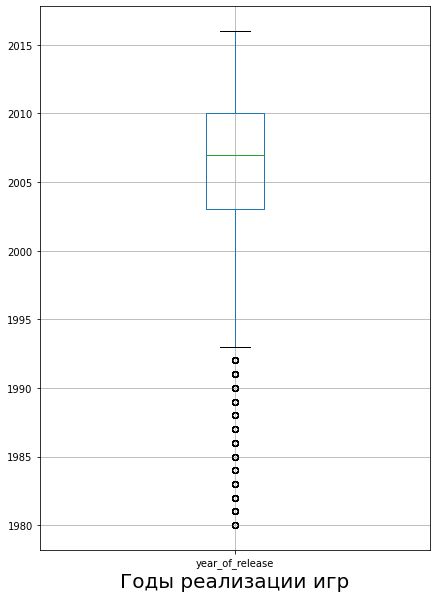

In [70]:
good_data.boxplot(column='year_of_release', figsize = (7,10), grid=True);
plt.xlabel('Годы реализации игр', fontsize = 20);
plt.show;


In [71]:
table_year = good_data.pivot_table(index='year_of_release', values='name', aggfunc=["count"])
table_year


,count
,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


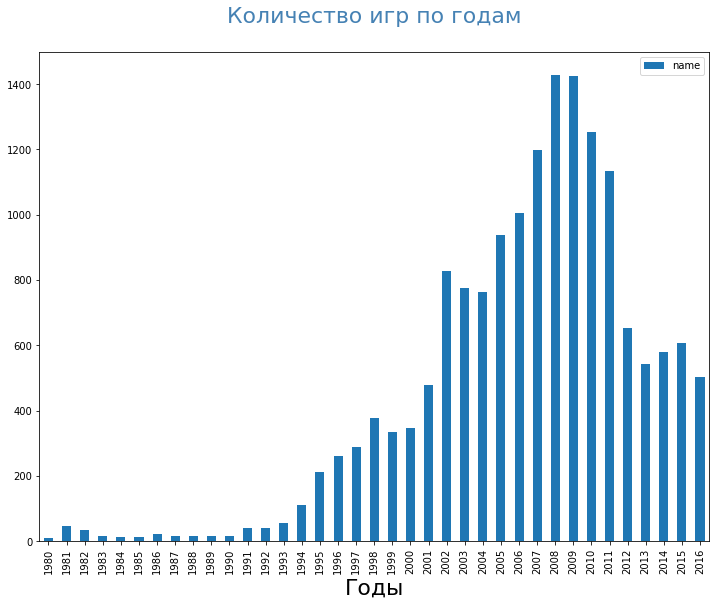

In [72]:
table_year.sort_values(by='year_of_release').plot(y='count', kind='bar', figsize =(12,9))
plt.title('Количество игр по годам' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Годы', fontsize = 22) 

plt.show()
                                                  
                                                  



Исходя из "усов" ящика предлагаю отсечь данны находятся за пределами 

In [73]:
good_data = good_data.query('1993<=year_of_release')

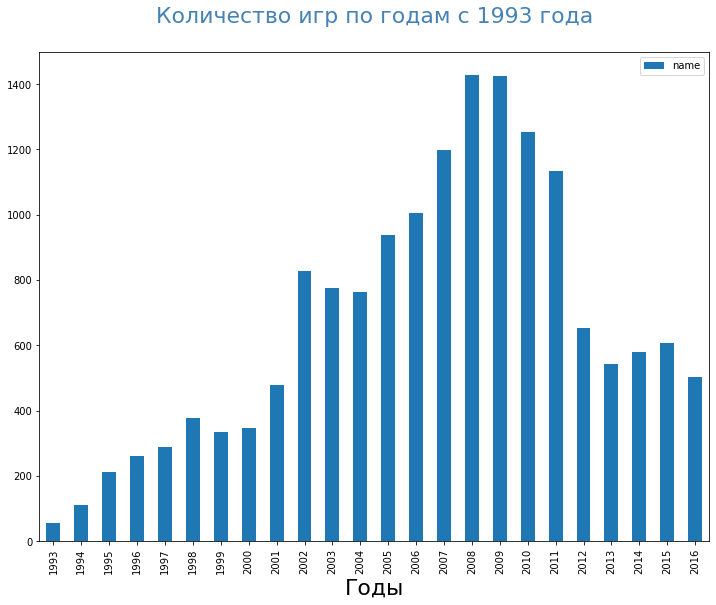

In [74]:
table_year = good_data.pivot_table(index='year_of_release', values='name', aggfunc=["count"])
table_year.sort_values(by='year_of_release').plot(y='count', kind='bar', figsize =(12,9));

plt.title('Количество игр по годам c 1993 года' + "\n", fontsize = 22, color = 'SteelBlue')
plt.xlabel('Годы', fontsize = 22) 

plt.show()

In [75]:
good_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
0,wii sports,Nintendo Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,Nintendo Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Nintendo Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB-60,1996,role-playing,11.27,8.89,10.22,1.00,-5.0,-5.0,Неопределено,31.38
6,new super mario bros.,Nintendo DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


#### Вывод
Мы изучили количество игр, которые выскались в разные годы:
1. Мы отсекли часть, где игры раньше 1993 года - их выпускалось очень мало
2. Наибольший пик создания игр приходится на период 2005 по 2011 включительно

###  Изменение продаж по платформам.
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [76]:
platform_data = good_data.groupby('platform').agg({'name':'count', 'total_income': 'sum'})
platform_data = platform_data.sort_values(by='total_income', ascending=False)
platform_data

,name,total_income
platform,,
PS2,2127,1233.56
Xbox 360,1232,961.24
PS3,1305,931.33
Nintendo Wii,1286,891.18
Nintendo DS,2120,802.76
PS,1190,727.58
PS4,392,314.14
Game Boy Advance,811,312.88
PSP,1193,289.53


Исходя из представленных данных мы можем, что за период 1993-2016 наибольшим спросом пользовалась:
- PS2,
- Xbox360,
- Nintendo Wii,
- PS3,
- Nintendo DS. <br>
Изучим указанные платформы детальнее

In [77]:
# функция лдя определения продаж по платформам
def total_income_by_platform(good_data, platform_name):
    platform = good_data.query("platform == @platform_name and year_of_release >=1996")
    income = platform.pivot_table(index = 'year_of_release'
                                  , values='total_income'
                                  , aggfunc='sum').sort_values('year_of_release', ascending=False)
    
    return income
    
    
    

In [78]:
top_platforms = platform_data.head(5)

In [79]:
top_platforms_list = top_platforms.index.tolist()

In [80]:
print(top_platforms_list)

['PS2', 'Xbox 360', 'PS3', 'Nintendo Wii', 'Nintendo DS']


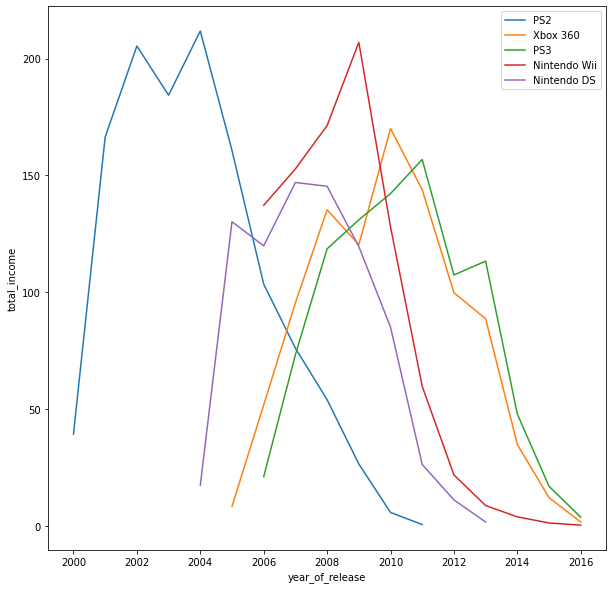

In [81]:
plt.figure(figsize=(10,10))

for i in top_platforms_list:
    sns.lineplot(data=total_income_by_platform(good_data, i)['total_income'], label=i)
 

#### Вывод
В среднем платформы живут  10 лет <br>
Пиковые значения по играм  у PS2 и Nintendo WII <br>
Максимальных значений график достигает в середине графика - 5 лет <br>
Nintendo Wii - самый резкий рост и самое быстрое падение <br>



Данный график показывает пиковые значения, а также интенсивность роста продаж игра на платформах, но мы не можем увидеть частоту продаж игра на платформах

### Анализ актуальных данных 2015-2016

Актуальные данные - мы возьмем данные за 2013-2015 гг.

In [82]:
actual_data = good_data.query('2013 <= year_of_release <= 2015')

In [83]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1731 entries, 16 to 16707
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1731 non-null   object 
 1   platform         1731 non-null   object 
 2   year_of_release  1731 non-null   Int64  
 3   genre            1731 non-null   object 
 4   na_sales         1731 non-null   float64
 5   eu_sales         1731 non-null   float64
 6   jp_sales         1731 non-null   float64
 7   other_sales      1731 non-null   float64
 8   critic_score     1731 non-null   float64
 9   user_score       1731 non-null   float64
 10  rating           1731 non-null   object 
 11  total_income     1731 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 177.5+ KB


In [84]:
actual_data['platform'].value_counts()

PS3               307
PS Vita           273
Nintendo 3DS      257
PS4               228
Xbox 360          173
Xbox One          160
PC                135
Nintendo Wii U    101
PSP                67
Nintendo Wii       22
Nintendo DS         8
Name: platform, dtype: int64

In [85]:
actual_data_platform = actual_data['platform'].value_counts().head(7)
actual_data_platform

PS3             307
PS Vita         273
Nintendo 3DS    257
PS4             228
Xbox 360        173
Xbox One        160
PC              135
Name: platform, dtype: int64

In [86]:
actual_data_platform = actual_data_platform.index.tolist()

In [87]:
actual_data_platform

['PS3', 'PS Vita', 'Nintendo 3DS', 'PS4', 'Xbox 360', 'Xbox One', 'PC']

In [88]:
actual_data_platform.remove("Xbox 360")

In [89]:
actual_data_platform.remove("PS3")

In [90]:
actual_data_platform

['PS Vita', 'Nintendo 3DS', 'PS4', 'Xbox One', 'PC']

In [91]:
#top_platforms['total_income'].describe()

In [92]:
print("Исходя из данных за последний годы(2015-2016) топ 3 платформы по количеству издаваемых игр являются:")
for k, v in enumerate(actual_data_platform ):
    print(f'{k+1}. - {v}')

Исходя из данных за последний годы(2015-2016) топ 3 платформы по количеству издаваемых игр являются:
1. - PS Vita
2. - Nintendo 3DS
3. - PS4
4. - Xbox One
5. - PC


#### Вывод
Исходя из данных за последний годы(2015-2016) топы платформ по количеству издаваемых игр являются: 

1. - PS Vita
2. - Nintendo 3DS
3. - PS4
4. - Xbox One
5. - PC



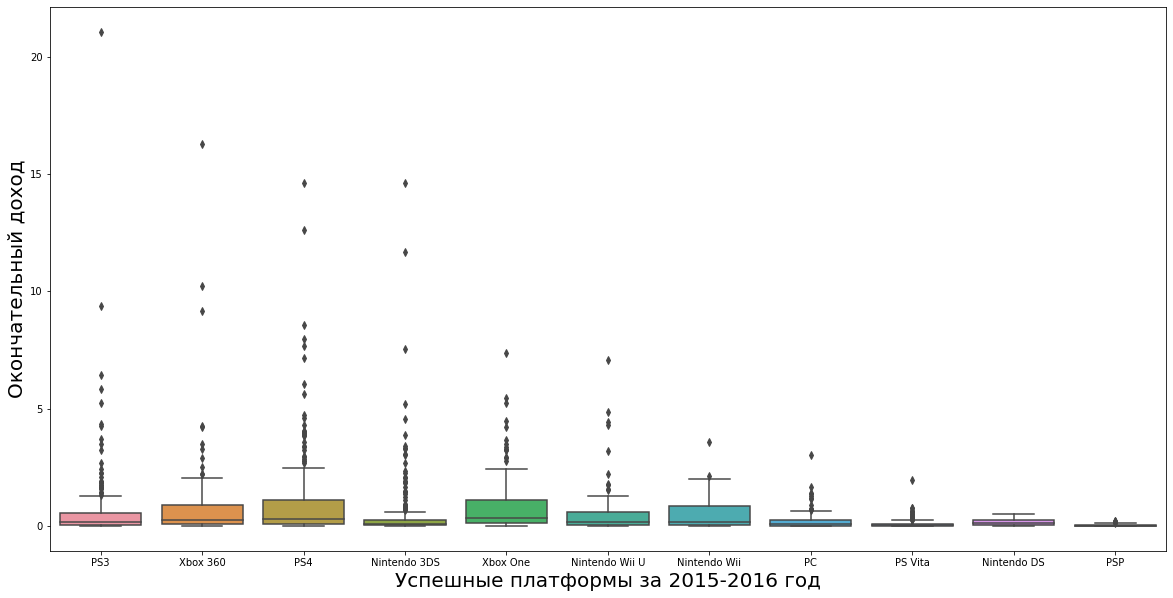

In [93]:
plt.figure(figsize=(20,10))




sns.boxplot(data=actual_data, x='platform', y='total_income');
plt.xlabel('Успешные платформы за 2015-2016 год', fontsize = 20);
plt.ylabel('Окончательный доход', fontsize = 20);
plt.show;



    



Исходя из данных мы видим, что медиана у всех платформ разная.
Наибольшее количество продаж было у PS3
Наименьшее количество продаж было у Nintendo DS

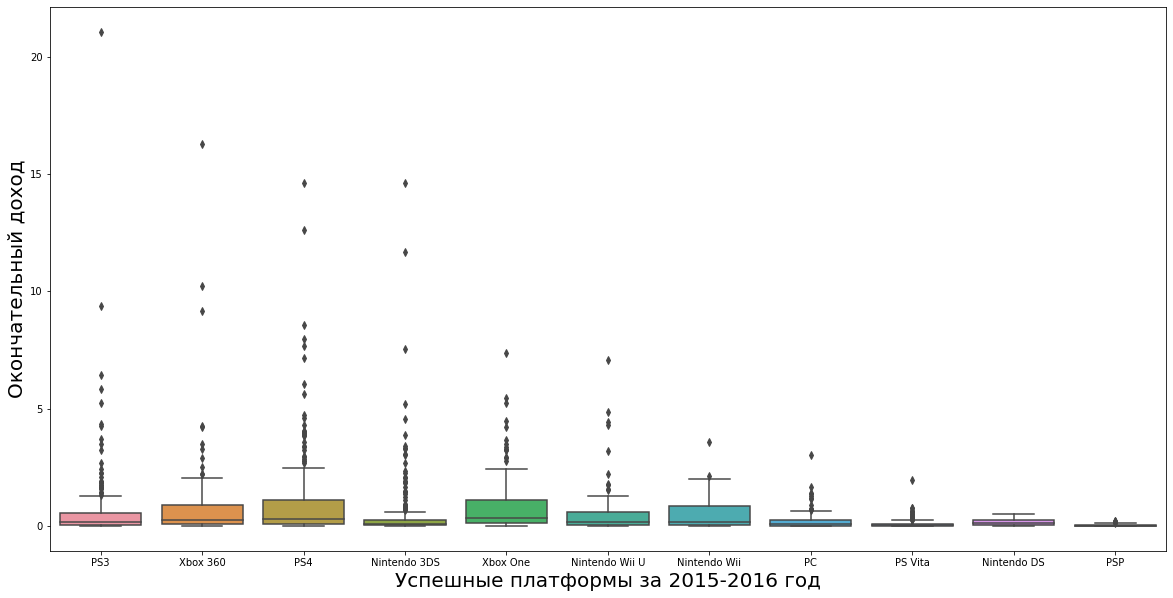

In [94]:
plt.figure(figsize=(20,10))


sns.boxplot(data=actual_data, x='platform', y='total_income');
plt.xlabel('Успешные платформы за 2015-2016 год', fontsize = 20);
plt.ylabel('Окончательный доход', fontsize = 20);
plt.show;

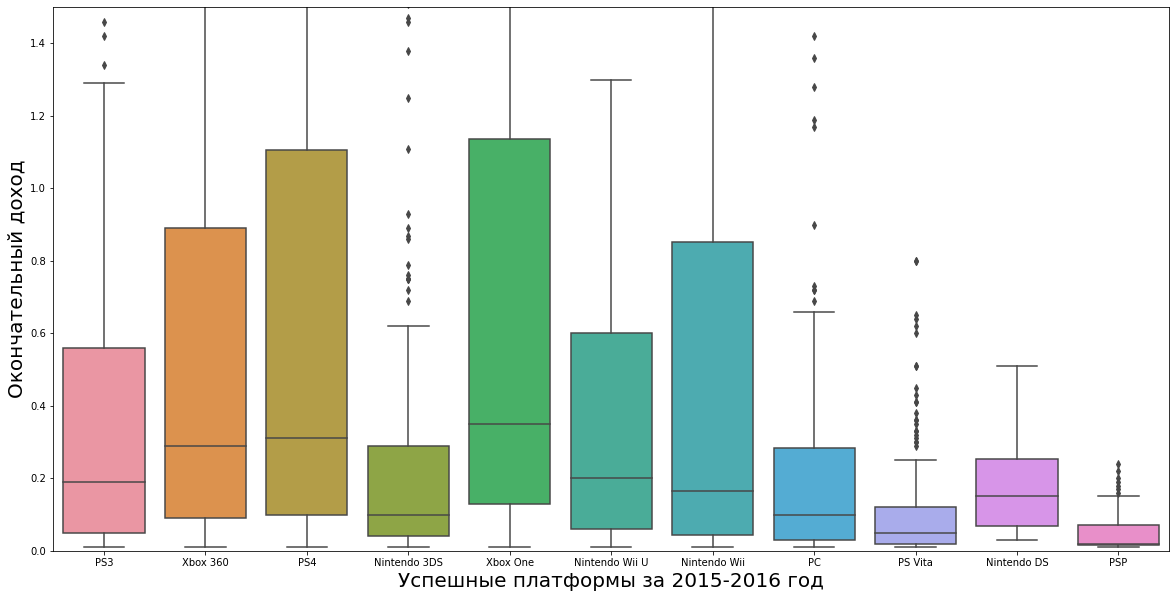

In [95]:
plt.figure(figsize=(20,10))


sns.boxplot(data=actual_data, x='platform', y='total_income');
plt.xlabel('Успешные платформы за 2015-2016 год', fontsize = 20);
plt.ylabel('Окончательный доход', fontsize = 20);
plt.ylim(0,1.5)
plt.show;

#### Вывод
Учитывая диаграмму размаха с выбросами можно сделать следующий вывод:
1. Nintendo Wii U является одной из стабильных платформ в отличие от других
2. Однако наибольшие продажи достигает PS4, Xbox One, Nintendo 3DS

In [96]:
actual_data.query('total_income >= 10')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
16,grand theft auto v,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,Xbox 360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,-5.0,-5.0,Неопределено,14.63
33,pokemon x/pokemon y,Nintendo 3DS,2013,role-playing,5.28,4.19,4.35,0.78,-5.0,-5.0,Неопределено,14.60
42,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,Nintendo 3DS,2014,role-playing,4.35,3.49,3.10,0.74,-5.0,-5.0,Неопределено,11.68
60,call of duty: ghosts,Xbox 360,2013,shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24


#### Вывод
Колда была очень популярной в 2015 год.

Возьмем данные с 2015 года.


### Определение продаж по платформам за 2014-2016 гг.

In [97]:
# функция для определения продаж по платформам 2014
def total_income_by_platform_2015(good_data, platform_name):
    platform = good_data.query("platform == @platform_name and year_of_release >=2014")
    income = platform.pivot_table(index = 'year_of_release', values='total_income', aggfunc='sum').sort_values('year_of_release', ascending=False)
    
    return income

In [98]:
actual_data_platform

['PS Vita', 'Nintendo 3DS', 'PS4', 'Xbox One', 'PC']

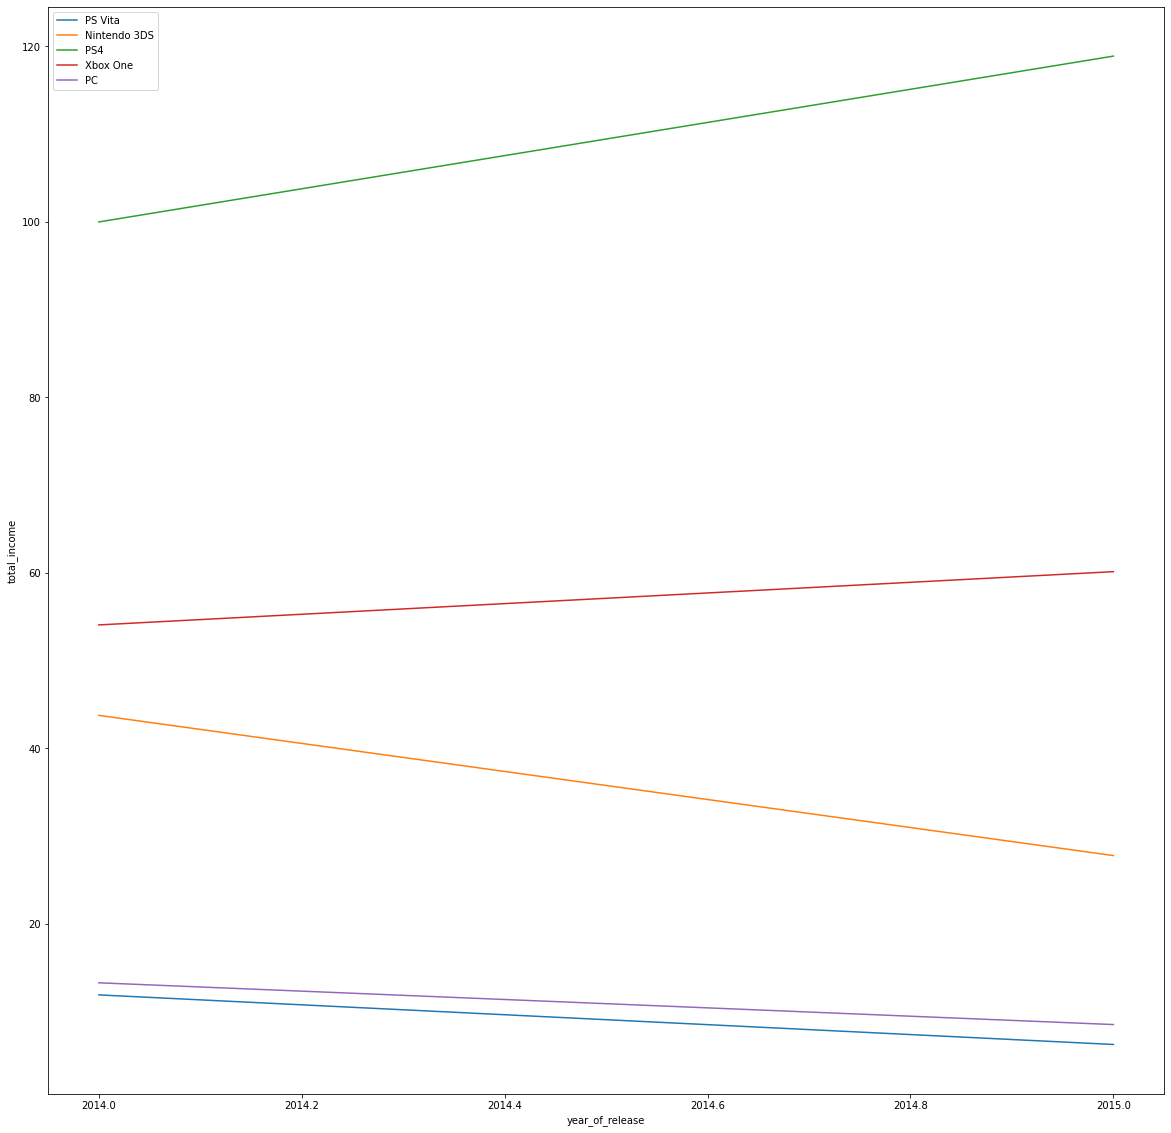

In [99]:
plt.figure(figsize=(20,20))

for i in actual_data_platform:
    sns.lineplot(data=total_income_by_platform_2015(actual_data, i)['total_income'], label=i)
 

#### Вывод
топ доходных платформ являются: 
1. PS4
2. Xbox One
3. Nintendo 3DS
4. PC
5. PS Vita

### Анализ влияния отзывов пользователей на продажи. Буду анализировать PS3

In [100]:
ps3_corr_income = good_data.query('platform == "PS3" and user_score > 0')


In [101]:

ps3_corr_income['user_score'].corr(ps3_corr_income['total_income'])

0.12792603540158226

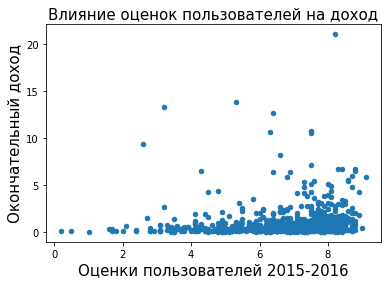

In [102]:
good_data.query('platform == "PS3" and user_score > 0').plot(x='user_score', y='total_income', kind='scatter');
plt.title('Влияние оценок пользователей на доход', fontsize = 15);
plt.xlabel('Оценки пользователей 2015-2016', fontsize = 15);
plt.ylabel('Окончательный доход', fontsize = 15);
plt.show;

#### Вывод
Кореляция от отзывов пользователей имеется

In [103]:
ps3_corr_income['critic_score'].corr(ps3_corr_income['total_income'])

0.29313862837071175

### Анализ влияния отзывов критиков на продажи. Буду анализировать PS3

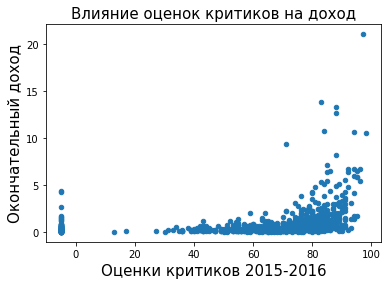

In [104]:
good_data.query('platform == "PS3" and user_score > 0').plot(x='critic_score', y='total_income', kind='scatter');
plt.title('Влияние оценок критиков на доход', fontsize = 15);
plt.xlabel('Оценки критиков 2015-2016', fontsize = 15);
plt.ylabel('Окончательный доход', fontsize = 15);
plt.show;

#### Вывод
Кореляция от отзывов критика имеется. Сильнее чем от отзывов пользователей.

### Влияние отзывов пользователей и критиков на другие платформы

In [105]:
# функция для определения кореляции и построения графика
def platform_corr_score_income(data, platform):
    corr_income = data.query("platform == @platform")
    
    corr_user = corr_income['user_score'].corr(corr_income['total_income']);
    graph_user = data.query('platform == @platform').plot(x='user_score', y='total_income', kind='scatter');
    plt.title('Влияние оценок пользователей на продажи ' + platform, fontsize= 10 , loc='left')
    plt.xlabel('Оценки пользователей 2015-2016', fontsize = 15);
    plt.ylabel('Продажи', fontsize = 15);
    
    corr_critics = corr_income['critic_score'].corr(corr_income['total_income']);
    graph_critics = data.query('platform == @platform').plot(x='critic_score', y='total_income', kind='scatter');
    plt.title('Влияние оценок критиков на продажи ' + platform, fontsize= 12 , loc='left')
    plt.xlabel('Оценки пользователей 2015-2016', fontsize = 15);
    plt.ylabel('Продажи', fontsize = 15);
    plt.show()
    
    if corr_user < 0.3:
        print(f' При игре на {platform} влияние оценки пользователей низкая')
    elif 0.3 <corr_user < 0.7:
        print(f' При игре на {platform} влияние оценки пользователей средняя')
    else:
        print(f' При игре на {platform} влияние оценки пользователей высокая')
        
    
    if corr_critics < 0.3:
        print(f' При игре на {platform} влияние оценки критиков низкая')
    elif 0.3 <corr_critics < 0.7:
        print(f' При игре на {platform} влияние оценки критиков средняя')
    else:
        print(f' При игре на {platform} влияние оценки критиков высокая')
        
        

    

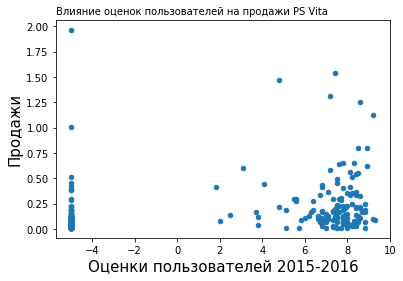

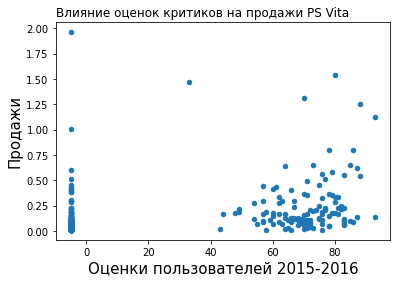

 При игре на PS Vita влияние оценки пользователей средняя
 При игре на PS Vita влияние оценки критиков средняя


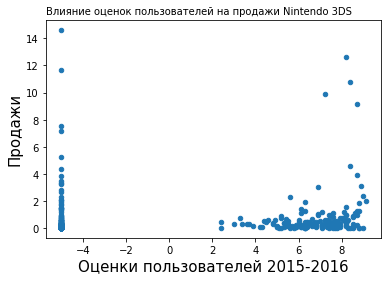

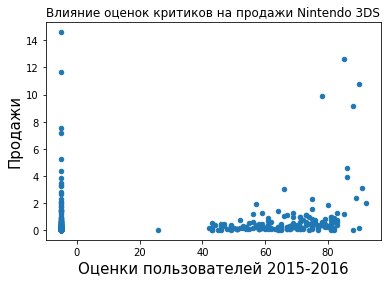

 При игре на Nintendo 3DS влияние оценки пользователей низкая
 При игре на Nintendo 3DS влияние оценки критиков низкая


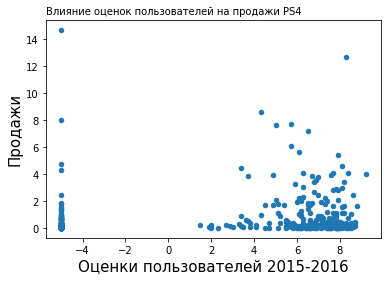

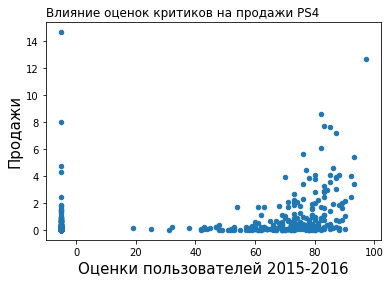

 При игре на PS4 влияние оценки пользователей низкая
 При игре на PS4 влияние оценки критиков низкая


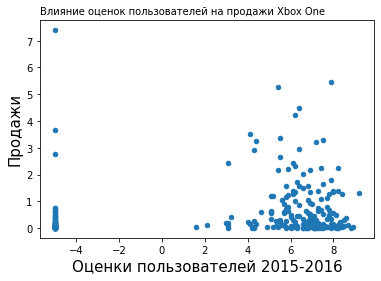

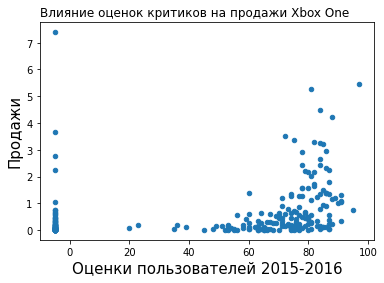

 При игре на Xbox One влияние оценки пользователей низкая
 При игре на Xbox One влияние оценки критиков низкая


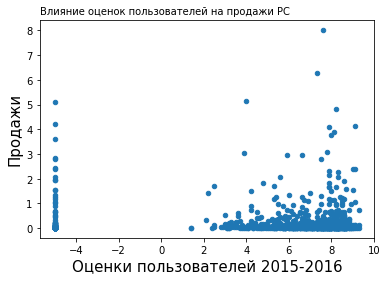

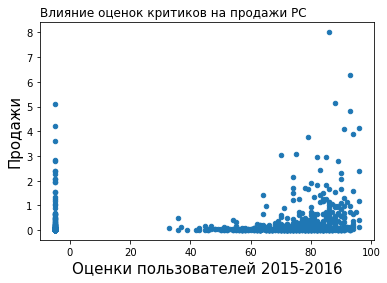

 При игре на PC влияние оценки пользователей низкая
 При игре на PC влияние оценки критиков низкая


In [106]:
for i in actual_data_platform:
    platform_corr_score_income(good_data, i)

#### Вывод 
Исходя из проведенного анализа влияние оценки критиков сильнее, чем оценки пользователей.

### Проанализируем жанр игр

In [107]:
genre_data = actual_data.groupby('genre').agg({'name':'count', 'total_income': 'sum'})
genre_data = genre_data.sort_values(by='total_income', ascending=False)
genre_data

,name,total_income
genre,,
action,588,291.76
shooter,140,194.76
role-playing,238,127.71
sports,166,127.16
misc,123,60.22
platform,59,39.40
racing,61,37.10
fighting,64,30.84
simulation,44,19.87


In [108]:
genre_list = genre_data.index.tolist()

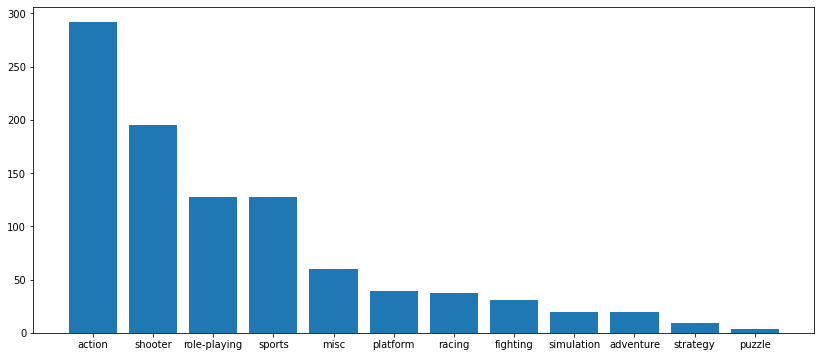

In [109]:
plt.figure(figsize=(14,6))
plt.bar(genre_list,genre_data['total_income']);

#### Вывод
в топ-5 продаж игр по стоимости входят:
1. shooter,
2. action,
3. sports,
4. role-playing
5. misc


### Проанализируем частоту продаж игр в зависимости от жанра

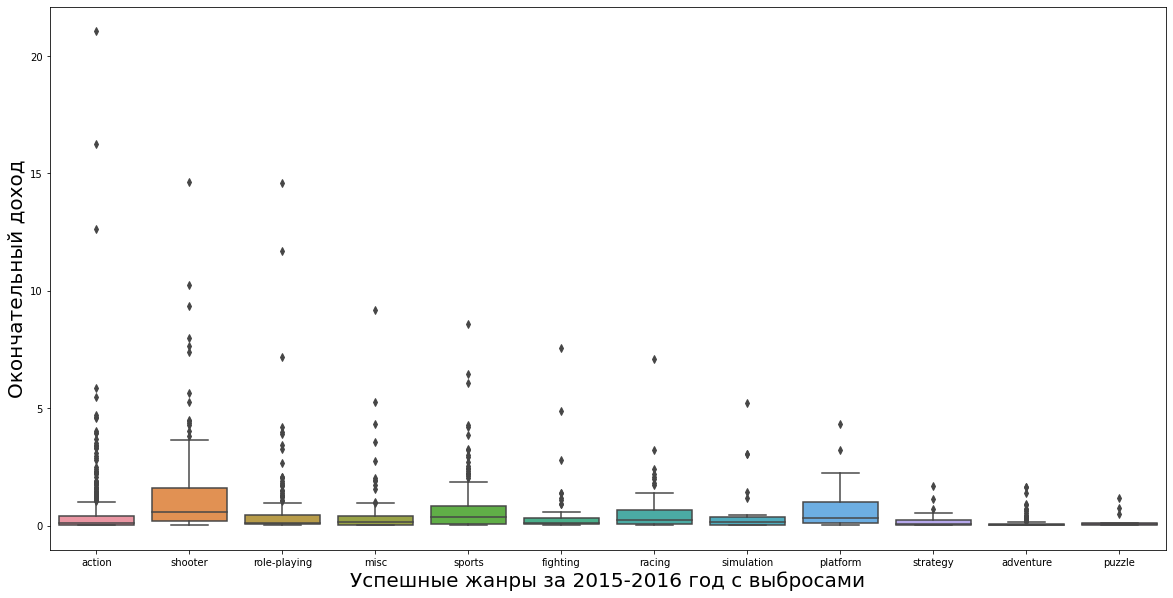

In [110]:
plt.figure(figsize=(20,10))


sns.boxplot(data=actual_data, x='genre', y='total_income');
plt.xlabel('Успешные жанры за 2015-2016 год с выбросами', fontsize = 20);
plt.ylabel('Окончательный доход', fontsize = 20);

plt.show;

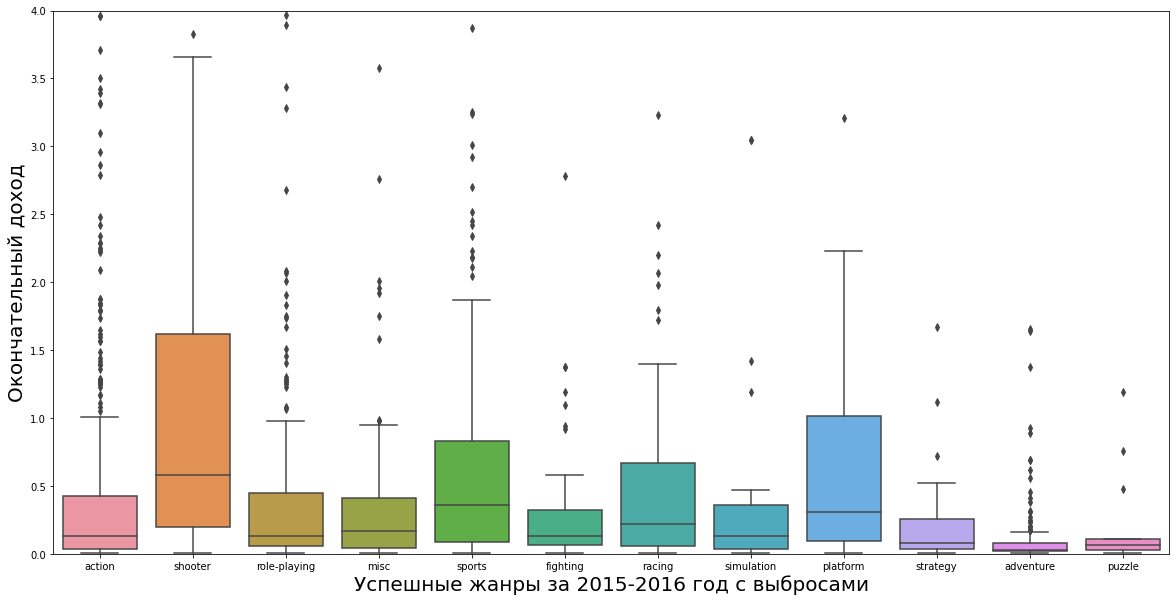

In [111]:
plt.figure(figsize=(20,10))


sns.boxplot(data=actual_data, x='genre', y='total_income');
plt.xlabel('Успешные жанры за 2015-2016 год с выбросами', fontsize = 20);
plt.ylabel('Окончательный доход', fontsize = 20);
plt.ylim(0,4)
plt.show;

#### Вывод


Мы можем составить топ 3 жанра:
1. shooters;
2. sports;
3. role-playing.


### Вывод 3го раздела
1. Исходя из ретроспективного анализа платформ наибольший прирост издаваемых игр пришел на период 2005-2011 гг.
2. Наиболее популярные платформы за период 1993-2016:
- PS2,
- Xbox360,
- Nintendo Wii,
- PS3,
- Nintendo DS.
3. В среднем платформы актуальны для пользователей 10 лет. Наибольшая прибыль у платформ достигает через 5 лет после ввода на рынок. Наибольшая прибыль была у PS2 и Nintendo WII. Nintendo Wii - самый резкий рост и самое быстрое падение

4. В 2015-2016 топы платфор по количеству издаваемых игр являются: 
 - PS4
 - PS Vita
 - Xbox One
 - Nintendo 3DS
 - PS3
 - PC
 - Xbox 360

4. В 2015-2016 годах Nintendo Wii U является одной из стабильных платформ в отличие от других, однако наибольшие продажи достигает PS4, Xbox One, Nintendo 3DS
4. В части жанрв в 2015 году пользователю нравятся:
- shooters;
- sports;
- role-playing.



##   портрет пользователя каждого региона
1. Определите для пользователя каждого региона (NA, EU, JP):
2. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
3. Самые популярные жанры (топ-5). Поясните разницу.
4. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [112]:
region = ["na_sales", "eu_sales", "jp_sales"]

In [113]:
actual_data.reset_index().head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_income
0,16,grand theft auto v,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,grand theft auto v,Xbox 360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,-5.0,-5.0,Неопределено,14.63
3,33,pokemon x/pokemon y,Nintendo 3DS,2013,role-playing,5.28,4.19,4.35,0.78,-5.0,-5.0,Неопределено,14.60
4,42,grand theft auto v,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


### Проанализируем какую платформу любит пользователь в зависимости от региона

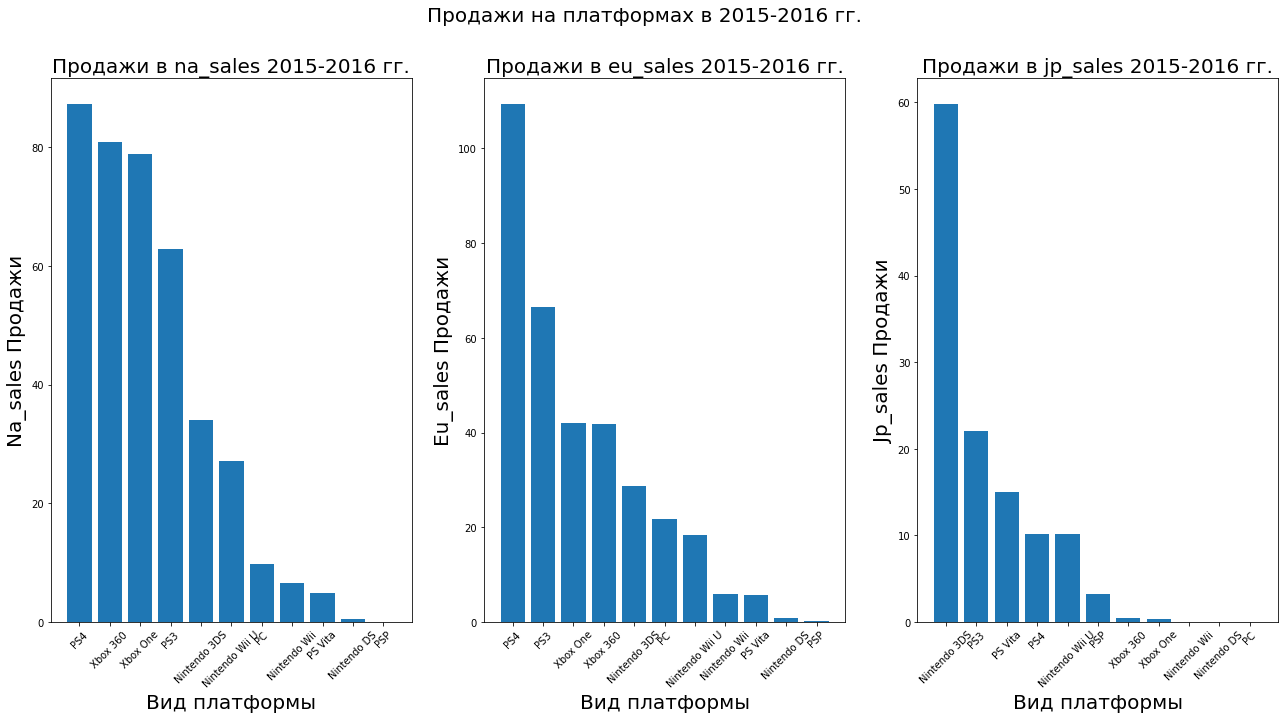

In [114]:
# определим на каких платформах пользователь любит играть
def plot_sales(data, group_by_column, label, sales_column, title, ax):
    income = data.groupby(group_by_column).agg({sales_column: 'sum'}).sort_values(by=sales_column, ascending=False)
    
    group_list = income.index.tolist()
    
    ax.bar(group_list, income[sales_column])
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(label, fontsize=20)
    ax.set_ylabel(f'{sales_column.capitalize()} Продажи', fontsize=20)
    ax.tick_params(axis='x', rotation=45)
     



fig, axs = plt.subplots(1, len(region), figsize=(22, 10))
fig.suptitle('Продажи на платформах в 2015-2016 гг.', fontsize=20)
 


for i, region_column in enumerate(region):
    main_title = f'Продажи в {region_column} 2015-2016 гг.'
    plot_sales(actual_data, 'platform', 'Вид платформы', region_column, main_title, axs[i])


plt.show()



### Проанализируем любимые жанры

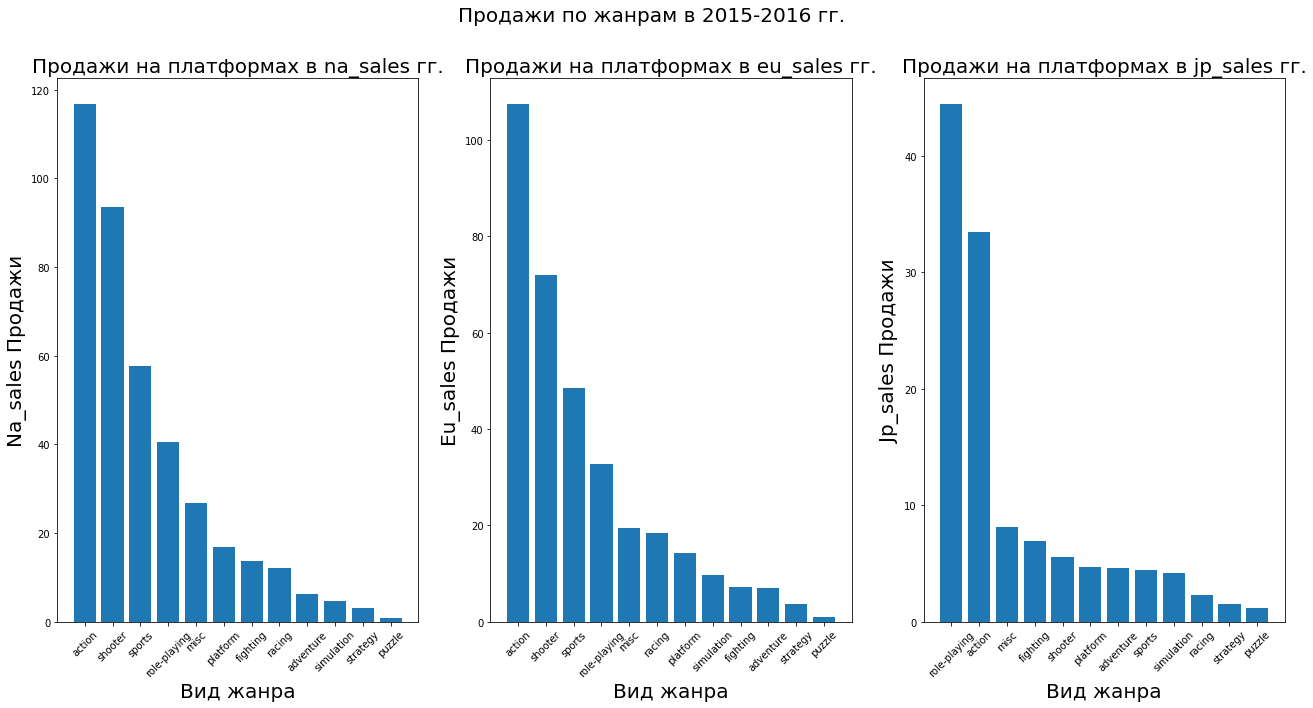

In [115]:
#а теперь посмотрим какие жанры любит пользователь

fig, axs = plt.subplots(1, len(region), figsize=(22, 10))
fig.suptitle('Продажи по жанрам в 2015-2016 гг.', fontsize=20)

for i, region_column in enumerate(region):
    main_title = f'Продажи на платформах в {region_column} гг.'
    plot_sales(actual_data, 'genre', 'Вид жанра', region_column, main_title, axs[i])
    

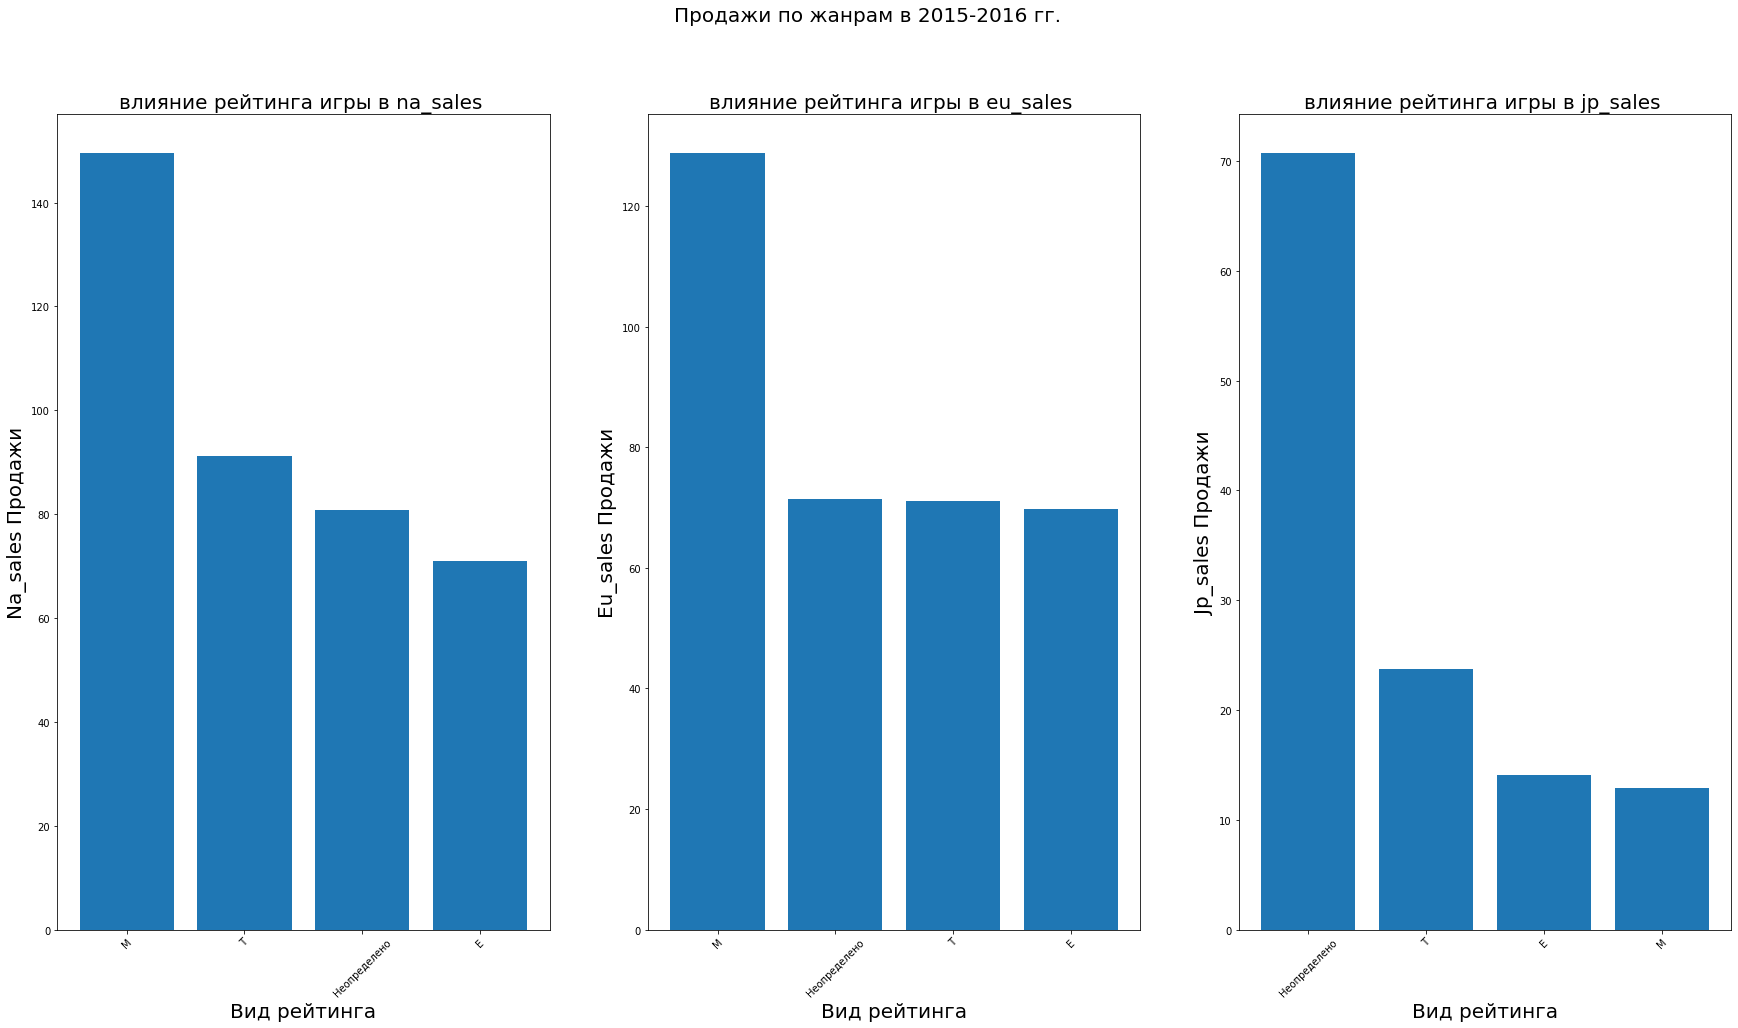

In [116]:
fig, axs = plt.subplots(1, len(region), figsize=(30, 15))
fig.suptitle('Продажи по жанрам в 2015-2016 гг.', fontsize=20)

for i, region_column in enumerate(region):
    main_title = f'влияние рейтинга игры в {region_column} '
    plot_sales(actual_data, 'rating', 'Вид рейтинга', region_column, main_title, axs[i])
    


### Создадим круговую диаграму

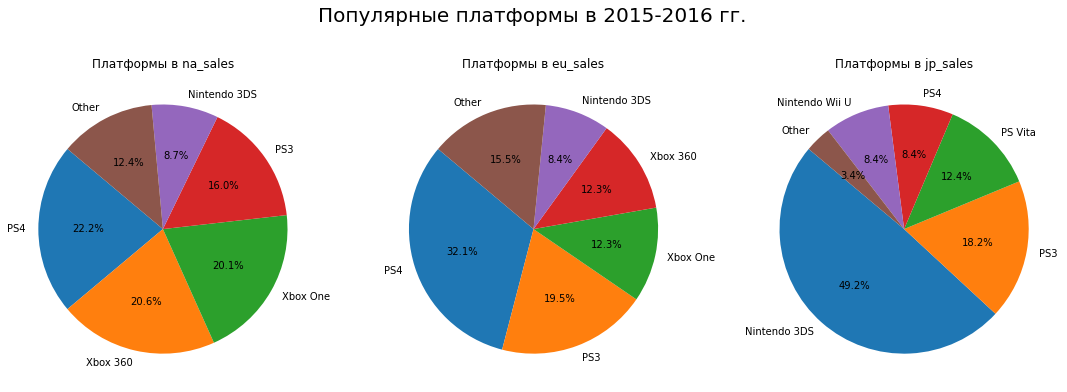

In [117]:
fig, axs = plt.subplots(1, len(region), figsize=(15, 6))
fig.suptitle('Популярные платформы в 2015-2016 гг.', fontsize=20)

for i in region:
    actual_data_user = actual_data.groupby('platform')[i].sum().reset_index().sort_values(by=i
                                                                                          , ascending=False
                                                                                          , ignore_index=True).head(5)
    #делаем колонку other: берем все платформы и вычитаем топ-5
    actual_data_user = actual_data_user.append({'platform': 'Other', i : actual_data[i].sum() - actual_data_user[i].sum()}, ignore_index = True)
    
    axs[region.index(i)].pie(actual_data_user[i], labels=actual_data_user['platform'], autopct='%1.1f%%', startangle=140)
    
    axs[region.index(i)].set_title(f'Платформы в {i}')

plt.tight_layout()
plt.show()


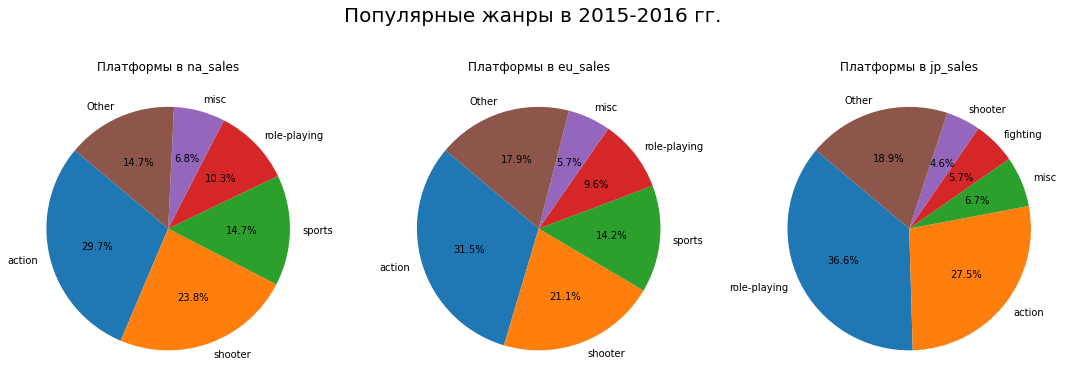

In [118]:
fig, axs = plt.subplots(1, len(region), figsize=(15, 6))
fig.suptitle('Популярные жанры в 2015-2016 гг.', fontsize=20)

for i in region:
    actual_data_user = actual_data.groupby('genre')[i].sum().reset_index().sort_values(by=i
                                                                                          , ascending=False
                                                                                          , ignore_index=True).head(5)
    
    actual_data_user = actual_data_user.append({'genre': 'Other', i : actual_data[i].sum() - actual_data_user[i].sum()}, ignore_index = True)
    
    axs[region.index(i)].pie(actual_data_user[i], labels=actual_data_user['genre'], autopct='%1.1f%%', startangle=140)
    
    axs[region.index(i)].set_title(f'Платформы в {i}')

plt.tight_layout()
plt.show()

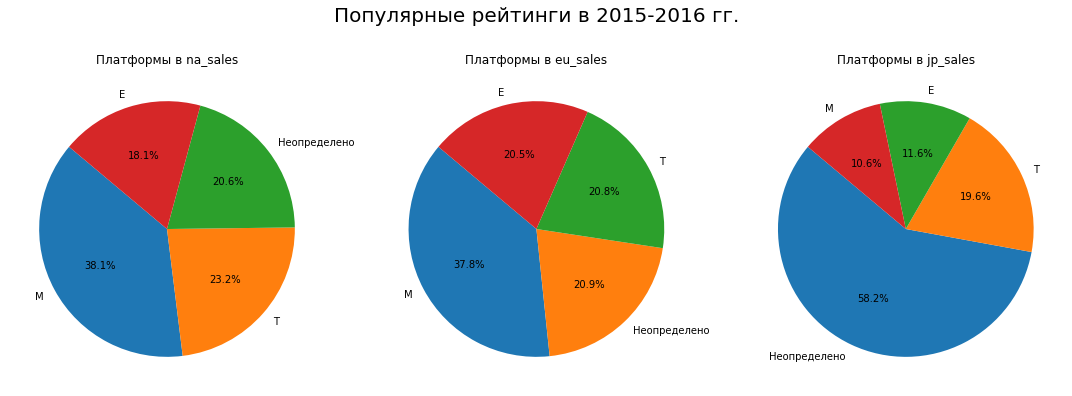

In [119]:
fig, axs = plt.subplots(1, len(region), figsize=(15, 6))
fig.suptitle('Популярные рейтинги в 2015-2016 гг.', fontsize=20)

for i in region:
    actual_data_user = actual_data.groupby('rating')[i].sum().reset_index().sort_values(by=i
                                                                                          , ascending=False
                                                                                          , ignore_index=True).head(5)
    
    
    
    axs[region.index(i)].pie(actual_data_user[i], labels=actual_data_user['rating'], autopct='%1.1f%%', startangle=140)
    
    axs[region.index(i)].set_title(f'Платформы в {i}')

plt.tight_layout()
plt.show()

#### Вывод

1. В Северной Америке пользователь любит
- играть на PS4, Xbox360, Xbox One,
- любит shooters, action, sports
- играют в основном взрослые или подростки (на основе рейтинга)

2. В Европе пользователь пользователь любит:
- играть на PS4, PS3 и Xbox One,
- любит shooters, action, sports
- играют в основном взрослые (на основе рейтинга)

3. В Японии пользователь любит:
- играть на Nintendo3DS, PS3, PS Vita. 
- любит actions, role-playing, misc
- играют в основном люди, неопределенные рейтингом.

## Основные выводы:




1. Построив распределение мы выявили топ-3 платформ за 2015-2016: 
- PS4.
- PS Vita.
- Xbox One.
2. Для рискового подхода (с выбросами) мы можем составить топ 3 жанра:
- shooters;
- sports;
- role-playing.

3. Для стабильного подхода (без выбросов) топ-3 жанра:
- shooters; (имеет стабильную медиану и длительный ряд продаж)
- platform; (стабильная медиана)
- simulation (имеет не совсем стабильную медиану, но один из длительных ряд продаж


3. Исходя из данных диаграммы - средний срок "жизни" платформы составляет 10 лет.
4. Пик продаж платформа достигает в среднем в 5 лет.
5. В среднем новая платформа появляется каждые 3 года 
6. По количеству продажам:
- наибольшее количество продаж было у PS3
- наименьшее количество продаж было у Nintendo DS
7. При игре на Xbox 360, PS3, PS2 влияние оценки пользователей низкая <br>
   При игре на Xbox 360, PS3, PS2 влияние оценки критиков средняя
   
   
8. В Северной Америке пользователь любит
играть на PS4 Xbox360, Xbox One,
любит shooters, action, sports
играют в основном взрослые или подростки (на основе рейтинга)
9. В Европе пользователь пользователь любит:
играть на PS4, PS3 и Xbox One,
любит shooters, action, sports
играют в основном взрослые (на основе рейтинга)
10. В Японии пользователь любит:
играть на Nintendo3DS, PS3, PS Vita.
любит actions, role-playing, misc
играют в основном люди, неопределенные рейтингом.




